In [ ]:
# !pip install TA-Lib ==>> Dá erro, porque precisa de ter TA-lib já instalada

# Como instalar:
# Baixar o arquivo aqui: https://www.lfd.uci.edu/~gohlke/pythonlibs/#ta-lib
# O meu python é 3.8.5, conforme celula abaixo, então baixei o arquivo 
# TA_Lib‑0.4.19‑cp38‑cp38‑win_amd64.whl
# cp38 se refere à versão do python
# depois, no prompt de comando, basta rodar:
# pip install (nome do arquivo baixado)

In [1]:
!python --version

Python 3.8.5


In [2]:
import pandas_datareader as pdr
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import talib

In [3]:
petr = pdr.get_data_yahoo('PETR4.SA', start='2019-01-01',end='2020-12-31')

In [7]:
petr.columns = [col.lower().replace(" ","_") for col in petr.columns]

In [8]:
petr

,high,low,open,close,volume,adj_close
Date,,,,,,
2019-01-02,24.200001,22.280001,22.549999,24.059999,104534800.0,23.284782
2019-01-03,24.820000,23.799999,23.959999,24.650000,95206400.0,23.855774
2019-01-04,24.940001,24.469999,24.850000,24.719999,72119800.0,23.923517
2019-01-07,25.920000,24.700001,24.850000,25.110001,121711900.0,24.300953
2019-01-08,25.420000,24.770000,25.400000,24.959999,68761800.0,24.155783
...,...,...,...,...,...,...
2020-12-22,27.469999,27.049999,27.200001,27.280001,46513200.0,27.280001
2020-12-23,28.250000,27.350000,27.430000,27.950001,49038900.0,27.950001
2020-12-28,28.520000,28.180000,28.360001,28.180000,36313300.0,28.180000


In [5]:
import plotly.graph_objects as go

In [50]:
fig = go.Figure(data=go.Ohlc(
    x=petr.index,
    open=petr['open'],
    high=petr['high'],
    low=petr['low'],
    close=petr['close'],
))
fig.show()

## Média móvel simples

In [9]:
petr['sma'] = talib.SMA(petr.adj_close, 8) # Padrão: 30 períodos

<AxesSubplot:title={'center':'média móvel'}, xlabel='Date'>

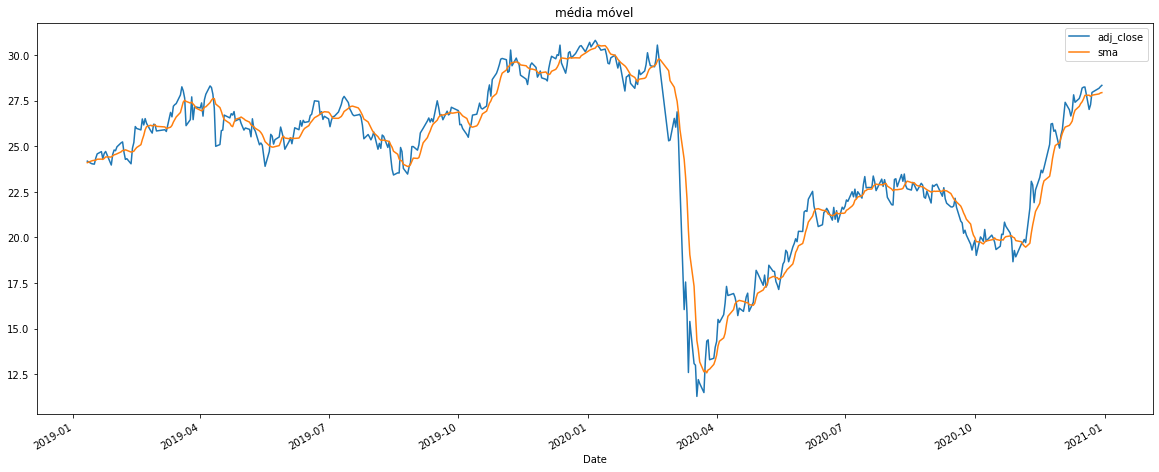

In [19]:
petr[['adj_close','sma']].dropna().plot(
    title="média móvel",
    figsize=(20,8)
)

## Bollinger Bands

In [24]:
upper, middle, lower = (a.dropna() for a in talib.BBANDS(petr.adj_close, matype=talib.MA_Type.T3))

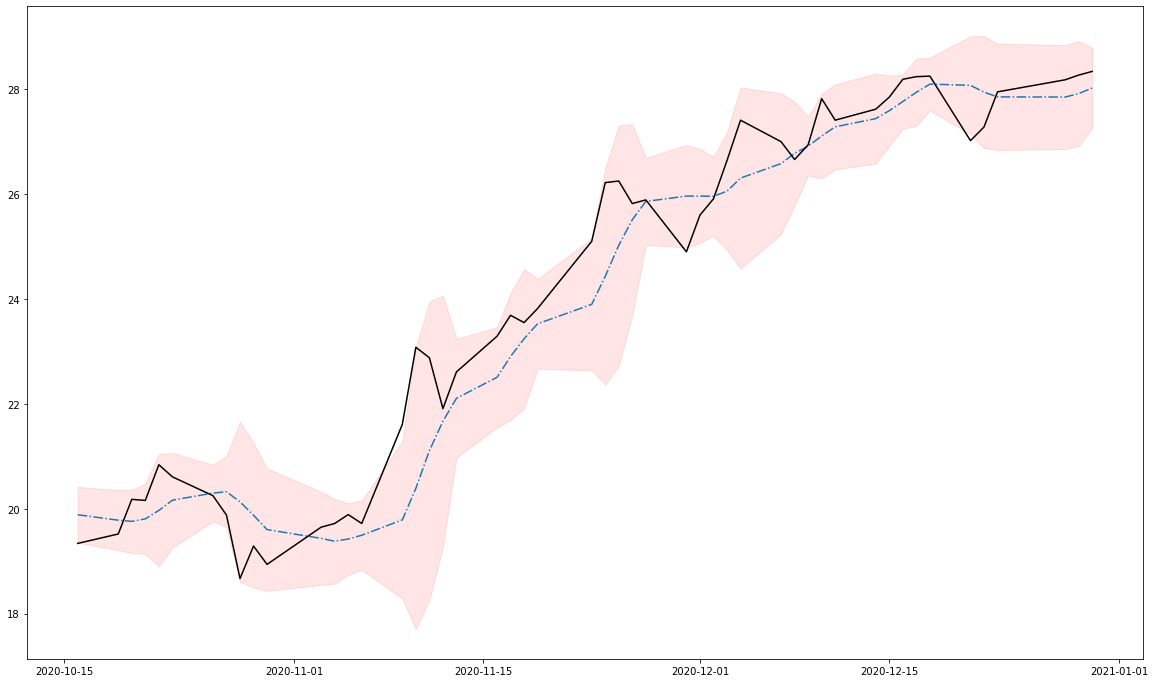

In [29]:
plt.figure(figsize=(20,12))
plt.plot(middle[-50:],"-.")
plt.plot(petr.adj_close[-50:], color="black")
plt.fill_between(
    middle[-50:].index,
    upper[-50:],lower[-50:],
    alpha=.1,
    color="red"
)


In [30]:
det = pd.concat([upper,lower,petr.adj_close],axis=1,join="inner")
det.columns=['up','lo','clo']

In [31]:
det['cruza'] = np.where(det.clo>det.up,1,0)
det['cruza'] = np.where(det.clo<det.lo,-1,det.cruza)

In [32]:
det.cruza.value_counts()

 0    429
-1     23
 1     18
Name: cruza, dtype: int64

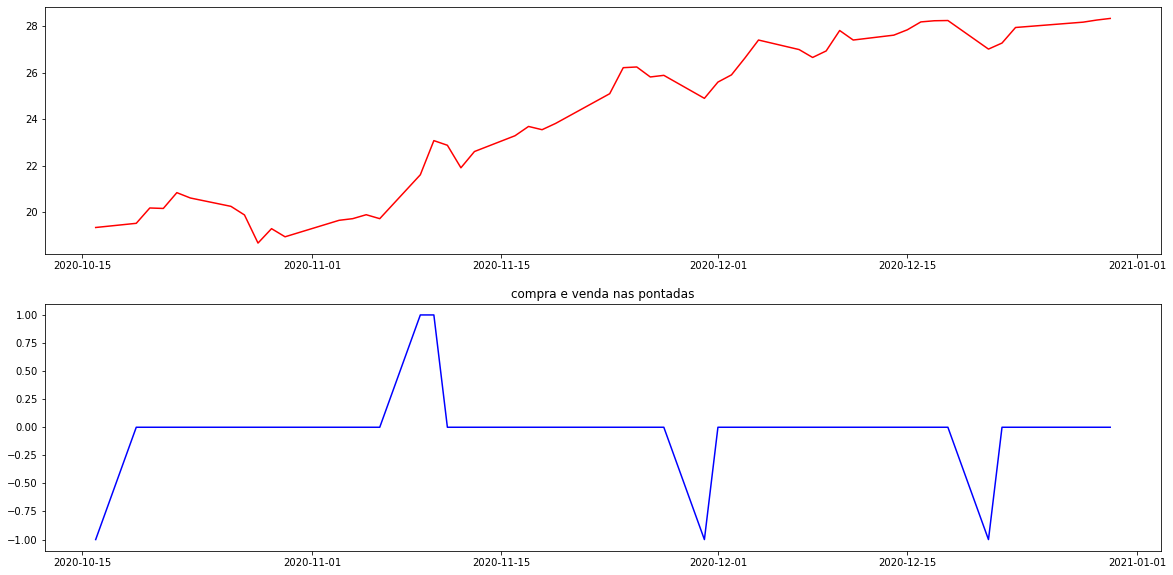

In [35]:
fig,ax = plt.subplots(2,1,figsize=(20,10))
ax[0].plot(det.clo[-50:],color="r")
ax[1].set_title('compra e venda nas pontadas')
ax[1].plot(det.cruza[-50:], color="blue")
plt.show()

In [36]:
det[det.cruza!=0]

,up,lo,clo,cruza
Date,,,,
2019-02-25,26.854751,25.862661,25.839722,-1
2019-03-19,28.253422,26.642258,28.259169,1
2019-03-22,29.267833,26.258342,26.130054,-1
2019-04-12,29.965230,25.063315,24.997755,-1
2019-04-25,26.644524,26.189374,26.904280,1
2019-05-07,26.505942,25.557558,25.518894,-1
2019-05-17,25.890837,23.939164,23.901569,-1
2019-05-28,25.956656,24.729609,26.053049,1
2019-07-01,27.177213,26.544642,26.500231,-1


## CDL3INSIDE - Three inside Up/Down

In [37]:
def unpack(ativo):
    return (ativo.open, ativo.high, ativo.low,ativo.close)

open_,high,low,close = unpack(petr)

<AxesSubplot:xlabel='Date'>

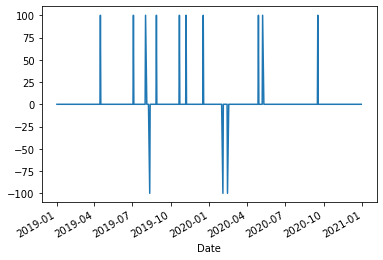

In [40]:
integer = talib.CDL3INSIDE(open_,high,low,close)
integer.plot()

## AROON

In [45]:
ad, aup = talib.AROON(high,low,timeperiod=14)

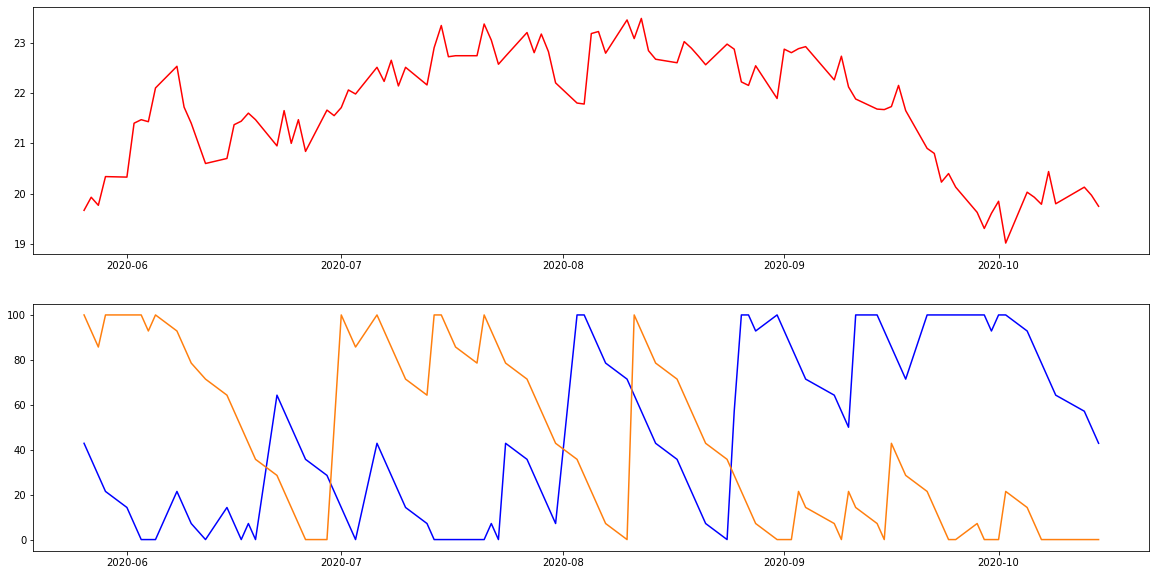

In [49]:
fig,ax=plt.subplots(2,1,figsize=(20,10))
ax[0].plot(petr.adj_close[-150:-50],color="r")
ax[1].plot(ad[-150:-50],color="blue")
ax[1].plot(aup[-150:-50],color="tab:orange")